In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
#Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

df=pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [100]:
Table1=df.describe()

Table1.to_excel("output.xlsx") 
Table1

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [101]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

<AxesSubplot:>

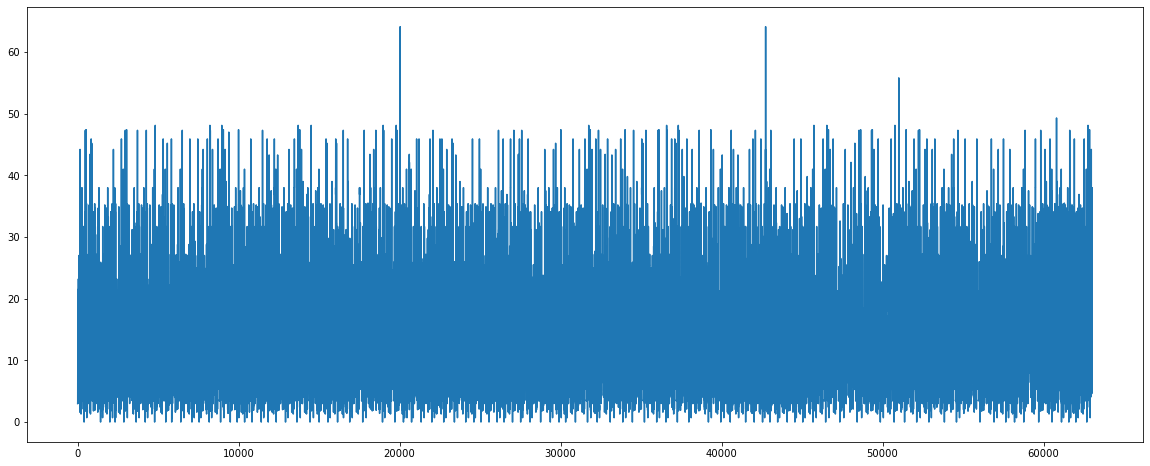

In [102]:
df['Distance'].plot(figsize = (20,8))

In [103]:
df.shape

(63023, 13)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [105]:
# Verifying columns with object data type
print(df.select_dtypes(["object"]).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname',
       'CouncilArea'],
      dtype='object')


In [106]:
# changing all object data types to category - This step is necessary to be able
# to plot categorical data for our analysis
obj_col = df.select_dtypes(["object"]).columns
df[obj_col] = df[obj_col].astype("category")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         63023 non-null  category
 1   Address        63023 non-null  category
 2   Rooms          63023 non-null  int64   
 3   Type           63023 non-null  category
 4   Price          48433 non-null  float64 
 5   Method         63023 non-null  category
 6   SellerG        63023 non-null  category
 7   Date           63023 non-null  category
 8   Postcode       63023 non-null  int64   
 9   Regionname     63023 non-null  category
 10  Propertycount  63023 non-null  int64   
 11  Distance       63023 non-null  float64 
 12  CouncilArea    63023 non-null  category
dtypes: category(8), float64(2), int64(3)
memory usage: 5.7 MB


In [108]:
pwd

'C:\\Users\\sanam'

# Data cleaning

In [109]:
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,False,False,False,False,False,False,False,False,False,False,False,False,False
63019,False,False,False,False,False,False,False,False,False,False,False,False,False
63020,False,False,False,False,False,False,False,False,False,False,False,False,False
63021,False,False,False,False,True,False,False,False,False,False,False,False,False


In [110]:
df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

<AxesSubplot:>

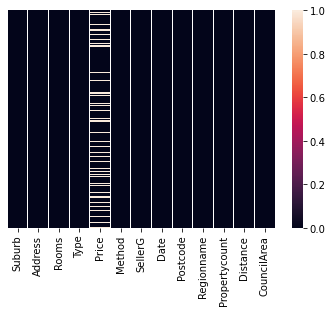

In [111]:
sns.heatmap(df.isnull(), yticklabels=False)


there are many null values in the price

<AxesSubplot:>

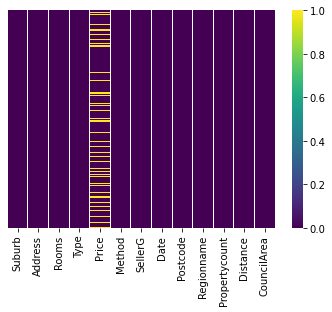

In [112]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:ylabel='Price'>

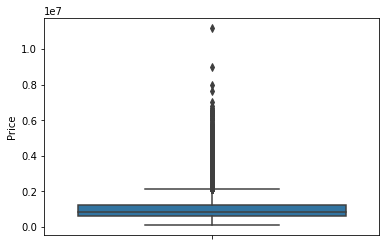

In [113]:
sns.boxplot(y='Price', data=df)

In [114]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [115]:
df.dropna(inplace=True)

In [116]:
#df.drop(columns='SellerG', axis=1, inplace=True) to drop column
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


<AxesSubplot:>

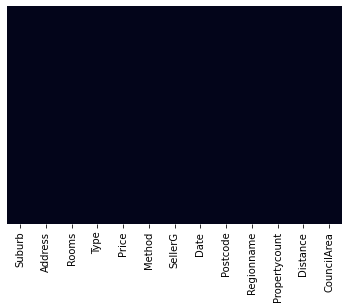

In [117]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) #can see the null values are all removed

In [118]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

# Outlier check

<AxesSubplot:ylabel='Rooms'>

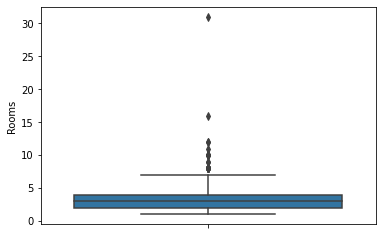

In [119]:
sns.boxplot(y=df["Rooms"])

<AxesSubplot:ylabel='Price'>

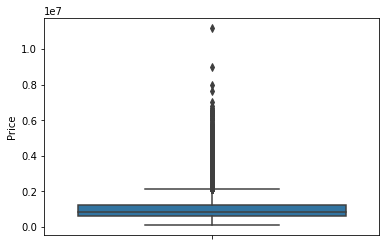

In [120]:
sns.boxplot(y=df["Price"])

In [121]:
#to find outlier
plt_sub=df.select_dtypes(["int64","float64"]).columns
plt_sub

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'], dtype='object')

In [122]:
df.loc[:,['Price', 'Propertycount', 'Distance']].quantile([0.5, 0.95, 0.99]) # quantile picks up the 50%, 95%, 99% quantile region so that we can see if the outlier. 0.5 is median, max- 0.99. 

,Price,Propertycount,Distance
0.50,830000.0,6567.0,11.7
0.95,2100000.0,15510.0,26.5
0.99,3200000.0,21650.0,38.0


In [123]:
# you can identifly median and find quantile and remove otulier
dfsub=df.loc[df['Price']< df['Price'].quantile(0.90)]


<AxesSubplot:ylabel='Price'>

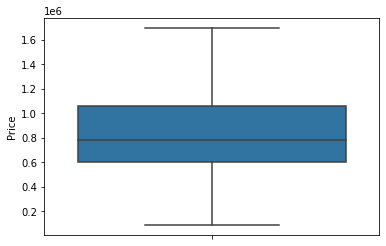

In [124]:
sns.boxplot(y=dfsub["Price"])

<AxesSubplot:ylabel='Rooms'>

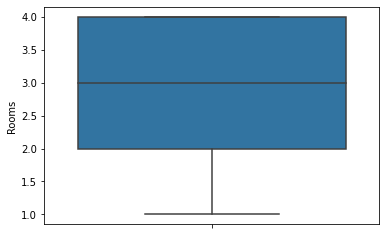

In [125]:
# you can identifly median and find quantile and remove otulier

df.loc[:, ['Rooms']].quantile([0.5, 0.95, 0.99])
df_rooms=df.loc[df['Rooms']< df['Rooms'].quantile(0.99)]
sns.boxplot(y=df_rooms["Rooms"])

Data visualisation to see outliers

0 0
0 1
1 0
1 1
2 0


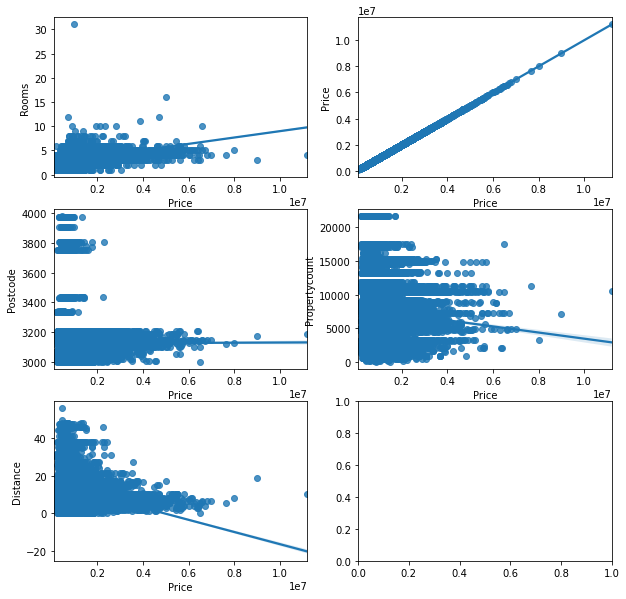

In [126]:
import seaborn as sns
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(10,10))
for i in range(0, len(plt_sub.values)):
    rows=i //2
    columns=i % 2
    print(rows, columns)
    ax=axs[rows, columns]
    plot = sns.regplot(x=df["Price"],y=plt_sub[i], data=df, ax=ax)
    

# univariate analysis

<AxesSubplot:ylabel='Frequency'>

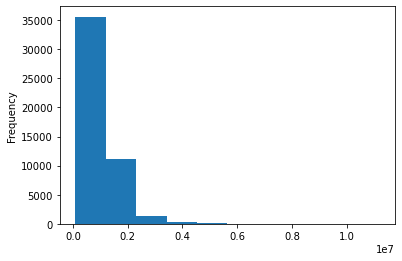

In [127]:
df['Price'].plot.hist()

<AxesSubplot:xlabel='Type', ylabel='count'>

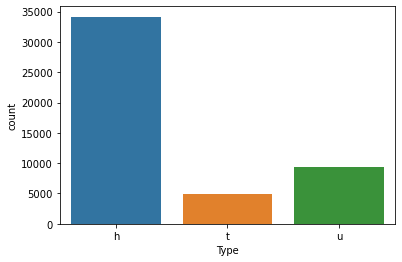

In [128]:
sns.countplot(x='Type',  data=df)

<AxesSubplot:xlabel='Type', ylabel='count'>

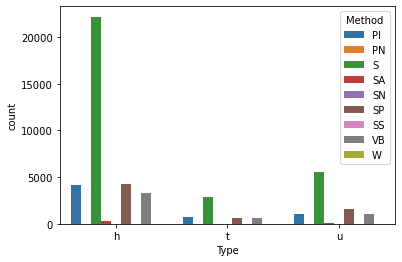

In [129]:
sns.countplot(x='Type', hue='Method', data=df)

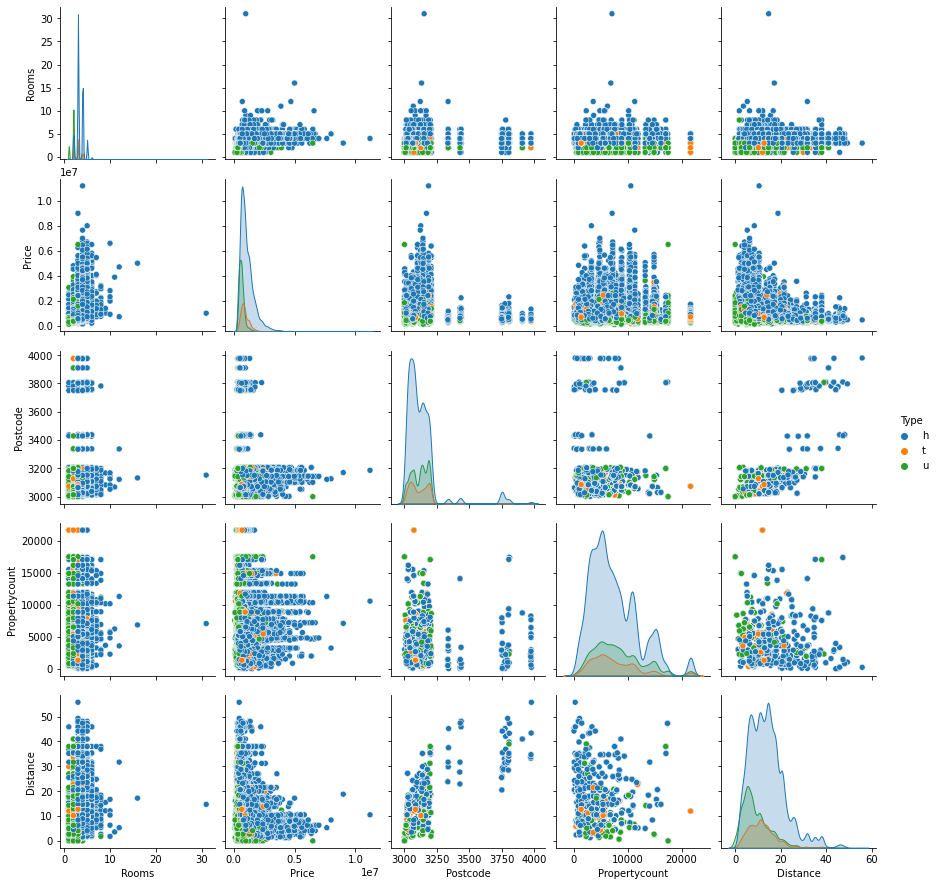

In [130]:
sns.pairplot(data=df, hue='Type')

# Maximum price for property based on each council

In [131]:
coun=df.groupby(["CouncilArea"])['Price'].agg(['mean', 'max'])
coun
coun1=coun.sort_values(by=['max'], ascending=False)
coun1.reset_index(inplace=True)
coun1
coun1.columns=[ "CouncilArea",'Average Price','Maximum Price']
coun2=coun1.head(5)
coun2


,CouncilArea,Average Price,Maximum Price
0,Bayside City Council,1.467352e+06,11200000.0
1,Monash City Council,1.167238e+06,9000000.0
2,Boroondara City Council,1.642149e+06,8000000.0
3,Stonnington City Council,1.574151e+06,7000000.0
4,Melbourne City Council,1.053538e+06,6500000.0


In [132]:
df['Regionname'].unique()

['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'South-Eastern Metropolitan', 'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']
Categories (8, object): ['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'South-Eastern Metropolitan', 'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']

In [133]:
df['Regionname'].value_counts()

Northern Metropolitan         13598
Southern Metropolitan         12549
Western Metropolitan           9680
Eastern Metropolitan           7585
South-Eastern Metropolitan     4010
Northern Victoria               455
Eastern Victoria                374
Western Victoria                182
Name: Regionname, dtype: int64

In [134]:
sub=df.groupby(["Suburb"])['Price'].agg(['mean', 'max'])
sub
sub.sort_values(by=['max'], ascending=False)


,mean,max
Suburb,,
Brighton,2.028911e+06,11200000.0
Mulgrave,9.033356e+05,9000000.0
Canterbury,2.228267e+06,8000000.0
Hawthorn,1.225010e+06,7650000.0
Armadale,1.568723e+06,7000000.0
...,...,...
Maddingley,NaN,NaN
Menzies Creek,NaN,NaN
Toolern Vale,NaN,NaN


# Price trend against year per house

In [135]:
import datetime
df["Date"]=pd.to_datetime(df["Date"])
df["Year"] = df["Date"].apply(lambda x:x.year)
df.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Year
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,2017
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2017


In [136]:
df['Type'].unique()

['h', 't', 'u']
Categories (3, object): ['h', 't', 'u']

In [137]:
# house price
df_h = df[df["Type"]=="h"]
# townhouse price
df_t = df[df["Type"]=="t"]
# unit house price
df_u = df[df["Type"]=="u"]
#house, townhouse, unit price groupby "year" and "mean"
df_house = df_h.groupby("Year").agg({"Rooms":'mean', "Price":'mean',"Propertycount":'mean', 'Distance':['mean', 'count']})
df_townhouse = df_t.groupby("Year").agg({"Rooms":'mean', "Price":'mean',"Propertycount":'mean', 'Distance':['mean', 'count']})
df_unit = df_u.groupby("Year").agg({"Rooms":'mean', "Price":'mean',"Propertycount":'mean', 'Distance':['mean', 'count']})
df_house
df_house.columns=["Total Rooms", 'Total price','Total property count', 'Total distance', 'Sold Count']
df_house

,Total Rooms,Total price,Total property count,Total distance,Sold Count
Year,,,,,
2016,3.366543,1.086204e+06,7265.837720,13.083011,9194
2017,3.375985,1.128698e+06,7480.039887,14.263819,14466
2018,3.364441,1.106985e+06,7515.737834,13.963870,10501


In [138]:

df_townhouse.columns=["Total Rooms", 'Total price','Total property count', 'Total distance', 'Sold Count']
df_townhouse

,Total Rooms,Total price,Total property count,Total distance,Sold Count
Year,,,,,
2016,2.919907,865040.977449,7220.655521,11.553110,1286
2017,2.911067,936865.796443,7452.533103,11.451038,2024
2018,2.909581,915483.742515,7510.879042,11.589102,1670


In [139]:
df_unit.columns=["Total Rooms", 'Total price','Total property count', 'Total distance', 'Sold Count']
df_unit

,Total Rooms,Total price,Total property count,Total distance,Sold Count
Year,,,,,
2016,2.048752,595202.419578,8216.576200,8.799155,2605
2017,2.066825,644236.752509,8074.643159,9.174485,3786
2018,2.062392,643004.304378,8150.526370,9.282385,2901


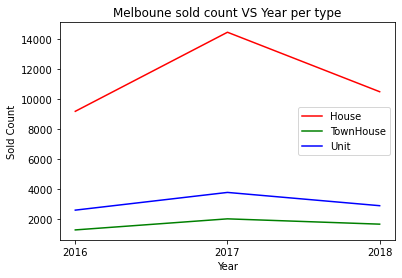

In [140]:
#how many house where sold per year
# sns.implot(x="Year", y="Price", hue="Type", data=melbourne_data,
# x_estimator=np.mean);
df_house["Sold Count"].plot(kind="line", color="r", label="House")
df_townhouse["Sold Count"].plot(kind="line", color="g", label="TownHouse")
df_unit["Sold Count"].plot(kind="line", color="b", label="Unit")
year_xticks=[2016,2017,2018]
plt.ylabel("Sold Count")
plt.xticks( year_xticks)
plt.title("Melboune sold count VS Year per type")
plt.legend()

# Train Decision Tree on Classification Task


In [141]:
from sklearn.tree import DecisionTreeClassifier
x=df[['Rooms', 'Postcode','Propertycount','Distance', 'Year','Price']]
y= df[['Type']]



In [142]:
clf=DecisionTreeClassifier(random_state=1)
model= clf.fit(x,y)

In [143]:
from sklearn import tree
text_rep = tree.export_text(clf)
print(text_rep)

|--- feature_0 <= 2.50
|   |--- feature_5 <= 824500.00
|   |   |--- feature_1 <= 3098.00
|   |   |   |--- feature_5 <= 594500.00
|   |   |   |   |--- feature_3 <= 8.45
|   |   |   |   |   |--- feature_5 <= 505250.00
|   |   |   |   |   |   |--- feature_2 <= 5160.50
|   |   |   |   |   |   |   |--- feature_4 <= 2016.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 4812.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 5.95
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 311000.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  311000.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: u
|   |   |   |   |   |   |   |   |   |--- feature_3 >  5.95
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 415000.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  415000.00
|   |   |   |   |   

In [144]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
featureNames = df[['Rooms', 'Postcode','Propertycount','Distance', 'Year','Price']]
targetNames = df[['Type']]

featureNames
targetNames 

,Type
0,h
1,h
2,h
3,h
4,h
...,...
63016,u
63017,h
63018,h
63019,h


In [145]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#out=tree.plot_tree(clf, feature_names=featureNames, class_names=targetNames, filled=True)

In [146]:
#splitting data-80:20
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)
print("Training split input- ", X_trainset.shape)
print("Testing split input- ", X_testset.shape)
dTree = DecisionTreeClassifier(random_state=1234)
dTree 
dTree.fit(X_trainset,y_trainset)


Training split input-  (33903, 6)
Testing split input-  (14530, 6)


DecisionTreeClassifier(random_state=1234)

In [147]:
#fig = plt.figure(figsize =(25,20))
#out=tree.plot_tree(dTree, feature_names=featureNames, class_names=targetNames, filled=True)

In [148]:
from sklearn import metrics
predTree = dTree.predict(X_testset)
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.795732966276669


In [149]:
from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(y_testset, predTree))

Classification report: 
               precision    recall  f1-score   support

           h       0.88      0.89      0.88     10255
           t       0.32      0.31      0.32      1530
           u       0.73      0.73      0.73      2745

    accuracy                           0.80     14530
   macro avg       0.64      0.64      0.64     14530
weighted avg       0.79      0.80      0.79     14530



In [150]:
#Create a new dataframe
#print("Enter Rooms:")
#Rooms = [int(x) for x in input()]
#print("Enter Postcode values")
#Postcode = [int(x) for x in input()]
#print("Enter Propertycount values")
#Propertycount = [int(x) for x in input()]
#print("Enter Distance values")
#Distance = [int(x) for x in input()]
#print("Enter Year values")
#Year = [int(x) for x in input()]
#print("Enter Price values")
#Price = [int(x) for x in input()]




In [151]:
#create a dataframe with column name Type
#pd.DataFrame({"Rooms": Rooms, "Postcode": Postcode, "Propertycount":Propertycount, "Distance": Distance, "Year":Year,"Price":Price })
data = [{'Rooms': 4, 'Postcode': 3030, 'Propertycount':410, 'Distance':4, 'Year':2017, 'Price':140000}]  
data
df_pred = pd.DataFrame(data) 

In [152]:
new=dTree.predict(df_pred)
new


array(['t'], dtype=object)

# Model Predicts the type of house an customer buys 

In [153]:
data = [{'Rooms': 4, 'Postcode': 3030, 'Propertycount':410, 'Distance':4, 'Year':2021, 'Price':140000}]  
data
df_pred = pd.DataFrame(data) 

In [154]:
dTree.predict(df_pred)
print("The good choice for the customer: " + new)

['The good choice for the customer: t']


# model predict the price of house 

In [155]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Year
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,2017
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2017


In [156]:
df.Rooms.unique()

array([ 3,  2,  4,  1,  5,  7,  6,  8, 11, 10,  9, 12, 31, 16],
      dtype=int64)

In [157]:
df.Type.unique()

['h', 't', 'u']
Categories (3, object): ['h', 't', 'u']

In [158]:
df.Address.unique()

['49 Lithgow St', '59A Turner St', '119B Yarra St', '68 Vida St', '92 Clydesdale Rd', ..., '4/34 Petrie St', '229 Murray Rd', '3 Carr Pl', '9 Parker Ct', '5 Parkinson Wy']
Length: 44739
Categories (44739, object): ['49 Lithgow St', '59A Turner St', '119B Yarra St', '68 Vida St', ..., '229 Murray Rd', '3 Carr Pl', '9 Parker Ct', '5 Parkinson Wy']

In [159]:
len(df.Address.unique())

44739

In [160]:
len(df.Suburb.unique())

370

In [161]:
df.Suburb.unique().shape

(370,)

In [162]:
df.SellerG.unique().shape

(422,)

In [163]:
df.Regionname.unique().shape

(8,)

In [164]:
df.CouncilArea.unique().shape

(34,)

In [165]:
df.groupby('Regionname')['Regionname'].agg('count')

Regionname
Eastern Metropolitan           7585
Eastern Victoria                374
Northern Metropolitan         13598
Northern Victoria               455
South-Eastern Metropolitan     4010
Southern Metropolitan         12549
Western Metropolitan           9680
Western Victoria                182
Name: Regionname, dtype: int64

In [166]:
df.groupby('Regionname')['Regionname'].agg('count').sort_values(ascending = False)

Regionname
Northern Metropolitan         13598
Southern Metropolitan         12549
Western Metropolitan           9680
Eastern Metropolitan           7585
South-Eastern Metropolitan     4010
Northern Victoria               455
Eastern Victoria                374
Western Victoria                182
Name: Regionname, dtype: int64

In [167]:
df.groupby('CouncilArea')['CouncilArea'].agg('count').sort_values(ascending = False)

CouncilArea
Darebin City Council              3462
Boroondara City Council           3455
Banyule City Council              2902
Brimbank City Council             2720
Moreland City Council             2519
Bayside City Council              2495
Monash City Council               2442
Hume City Council                 2373
Glen Eira City Council            2351
Moonee Valley City Council        2163
Whittlesea City Council           2059
Melbourne City Council            2055
Kingston City Council             2025
Maribyrnong City Council          1734
Manningham City Council           1730
Whitehorse City Council           1320
Yarra City Council                1320
Port Phillip City Council         1291
Stonnington City Council          1228
Wyndham City Council              1154
Hobsons Bay City Council          1112
Maroondah City Council            1006
Knox City Council                  750
Frankston City Council             656
Greater Dandenong City Council     596
Melton City C

In [168]:
df_Suburb = df.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending = False)
df_Suburb

Suburb
Reservoir            1067
Bentleigh East        696
Richmond              642
Craigieburn           598
Preston               593
                     ... 
Guys Hill               0
Yarrambat               0
Lysterfield South       0
Gembrook                0
Maddingley              0
Name: Suburb, Length: 380, dtype: int64

In [169]:
Suburb_zero = df_Suburb[df_Suburb <= 2]
Suburb_zero 

Suburb
Werribee South       2
Cranbourne South     2
Ferny Creek          2
Panton Hill          2
Kilsyth South        2
Lyndhurst            2
Monbulk              2
Park Orchards        2
Belgrave Heights     1
Wildwood             1
Pentland Hills       1
Belgrave             1
Belgrave South       1
Kallista             1
Woori Yallock        1
Yan Yean             1
Kalorama             1
Yarra Junction       1
croydon              1
Olinda               1
viewbank             1
Don Valley           1
Warrandyte South     1
Castella             1
Wandin North         1
Chintin              1
Cockatoo             1
Coldstream           1
Warneet              1
Mount Dandenong      1
Darley               1
Seville              1
Hopetoun Park        0
Toolern Vale         0
Warburton            0
Avonsleigh           0
Menzies Creek        0
Guys Hill            0
Yarrambat            0
Lysterfield South    0
Gembrook             0
Maddingley           0
Name: Suburb, dtype: int64

In [170]:
df['Suburb'] = df['Suburb'].apply(lambda x: 'other' if x in Suburb_zero else x  )

In [171]:
df.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending = False)

Suburb
Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
                  ... 
Lysterfield          3
Bulla                3
Yarra Glen           3
Kalkallo             3
Botanic Ridge        3
Name: Suburb, Length: 339, dtype: int64

In [172]:
df[df['Suburb'] == 'other']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Year
1139,other,656 Oconnors Rd,2,h,355000.0,S,Harcourts,2017-01-07,3030,Western Metropolitan,821,14.7,Wyndham City Council,2017
2298,other,36 Seabreeze Av,3,h,690000.0,S,FN,2018-03-02,3786,Eastern Victoria,604,29.5,Yarra Ranges Shire Council,2018
3174,other,237 Warburton Hwy,4,h,1150000.0,PI,Max,2018-03-03,3139,Eastern Victoria,1130,35.2,Yarra Ranges Shire Council,2018
5568,other,109 Palmers La,4,h,875000.0,VB,Len,2016-03-12,3341,Western Victoria,59,45.2,Moorabool Shire Council,2016
9455,other,17 Memory Ct,5,h,890000.0,SP,Fletchers,2017-06-05,3137,Eastern Metropolitan,962,26.0,Maroondah City Council,2017
10069,other,1842 Warburton Hwy,4,h,950000.0,S,Bell,2016-06-08,3139,Northern Victoria,1164,35.2,Yarra Ranges Shire Council,2016
10435,other,15 Bishops Rd,4,h,651000.0,S,Barry,2018-06-10,3759,Northern Victoria,386,28.4,Nillumbik Shire Council,2018
15726,other,108 Brysons Rd,3,h,1380000.0,SP,Jellis,2018-08-09,3134,Eastern Metropolitan,216,19.9,Manningham City Council,2018
16482,other,57 Lyndhurst Bvd,4,h,902000.0,S,Area,2018-09-06,3975,South-Eastern Metropolitan,1934,33.8,Casey City Council,2018
20605,other,13 Lisheen Rd,4,h,397000.0,S,Kaye,2018-11-08,3781,Eastern Victoria,1636,42.1,Cardinia Shire Council,2018


In [173]:
dummies = pd.get_dummies(df.Suburb)
dummies

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df_1 = pd.concat([df, dummies], axis = 'columns')
df_1

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville,other
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,...,0,0,0,0,0,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,2018-03-31,3199,South-Eastern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,2018-03-31,3072,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df_1 = pd.concat([df, dummies.drop('other', axis = 'columns')], axis = 'columns')
df_1

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,...,0,0,0,0,0,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,2018-03-31,3199,South-Eastern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,2018-03-31,3072,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,0,0,0,0,0


In [176]:
dummies_1 = pd.get_dummies(df.Type).drop('u', axis = 'columns')

dummies_1

,h,t
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
63016,0,0
63017,1,0
63018,1,0
63019,1,0


In [177]:
dummies_2 = pd.get_dummies(df.Method).drop('W', axis = 'columns')

dummies_2

,PI,PN,S,SA,SN,SP,SS,VB
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63016,0,0,0,0,0,1,0,0
63017,0,0,1,0,0,0,0,0
63018,0,0,1,0,0,0,0,0
63019,0,0,1,0,0,0,0,0


In [178]:
dummies_3 = pd.get_dummies(df.Regionname).drop('Western Victoria', axis = 'columns')

dummies_3

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
63016,0,0,0,0,1,0,0
63017,0,0,1,0,0,0,0
63018,0,0,1,0,0,0,0
63019,0,0,1,0,0,0,0


In [179]:
df_2 = pd.concat([df_1, dummies_1], axis = 'columns')
df_2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville,h,t
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,1,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,0,0,0,1,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,...,0,0,0,0,0,0,0,0,1,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,2018-03-31,3199,South-Eastern Metropolitan,...,0,0,0,0,0,0,0,0,0,0
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,2018-03-31,3072,Northern Metropolitan,...,0,0,0,0,0,0,0,0,1,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,0,0,0,1,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,0,0,0,1,0


In [180]:
df_3 = pd.concat([df_2, dummies_2], axis = 'columns')
df_3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,h,t,PI,PN,S,SA,SN,SP,SS,VB
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,...,1,0,0,0,1,0,0,0,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,...,1,0,0,0,1,0,0,0,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,...,1,0,0,0,1,0,0,0,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,...,1,0,0,0,1,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,2018-03-31,3199,South-Eastern Metropolitan,...,0,0,0,0,0,0,0,1,0,0
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,2018-03-31,3072,Northern Metropolitan,...,1,0,0,0,1,0,0,0,0,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,1,0,0,0,1,0,0,0,0,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,1,0,0,0,1,0,0,0,0,0


In [181]:
df_4 = pd.concat([df_3, dummies_3], axis = 'columns')
df_4

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,SP,SS,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,1,0,0,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,1,0,0,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,...,0,0,0,0,0,1,0,0,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,...,0,0,0,0,0,0,0,0,0,1
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,2018-03-31,3199,South-Eastern Metropolitan,...,1,0,0,0,0,0,0,1,0,0
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,2018-03-31,3072,Northern Metropolitan,...,0,0,0,0,0,1,0,0,0,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,1,0,0,0,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,...,0,0,0,0,0,1,0,0,0,0


In [182]:
df_5 = df_2.drop(['Suburb','Address', 'Type', 'Method', 'SellerG', 'Regionname', 'Date', 'CouncilArea'], axis = 'columns' )

In [183]:
x = df_5.drop('Price', axis = 'columns')
y = df_5.Price

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [185]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6514663729775862

# CROSS VALIDATION

In [186]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.65738309, 0.63854663, 0.62589066, 0.63016838, 0.63570156])

In [187]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [188]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
            'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    scores = []


    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [189]:
find_best_model_using_gridsearchcv(x,y)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2443934906208097.0, tolerance: 1360968128629.141
  model = cd_fast.enet_coordinate_descent(
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2431175079628522.5, tolerance: 1372601091004.847
  model = cd_fast.enet_coordinate_descent(
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2396373991083667.5, tolerance: 1363971355997.2017
  model = cd_fast.enet_coordinate_descent(
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

,model,best_score,best_params
0,linear_regression,0.637538,{'normalize': True}
1,lasso,0.637585,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.703776,"{'criterion': 'mse', 'splitter': 'random'}"
